In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/laptop forest/Desktop/Data science/product_sales.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Types and Null Values:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (15000, 8)

First few rows:
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  

Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null 

In [3]:
# 1. Check the 'week' column
print("Week values:", sorted(df['week'].unique()))

# 2. Check the 'sales_method' column
print("\nUnique sales methods:", df['sales_method'].unique())

# Clean the sales_method column
df['sales_method'] = df['sales_method'].str.title()
df['sales_method'] = df['sales_method'].replace('Em + Call', 'Email + Call')
print("\nCleaned sales methods:", df['sales_method'].unique())

# 3. Check the 'customer_id' column
print("\nNumber of unique customer IDs:", df['customer_id'].nunique())
print("Any duplicate customer IDs?", df['customer_id'].duplicated().any())

# 4. Check the 'nb_sold' column
print("\nMinimum items sold:", df['nb_sold'].min())
print("Maximum items sold:", df['nb_sold'].max())

# 5. Check the 'revenue' column
print("\nRevenue - Missing values:", df['revenue'].isna().sum())
print("Revenue - Summary stats:")
print(df['revenue'].describe())

# 6. Check the 'years_as_customer' column
print("\nYears as customer - Min:", df['years_as_customer'].min())
print("Years as customer - Max:", df['years_as_customer'].max())

# 7. Check the 'nb_site_visits' column
print("\nSite visits - Min:", df['nb_site_visits'].min())
print("Site visits - Max:", df['nb_site_visits'].max())

# 8. Check the 'state' column
print("\nNumber of unique states:", df['state'].nunique())

# Create a cleaned dataframe for analysis
cleaned_df = df.copy()

Week values: [1, 2, 3, 4, 5, 6]

Unique sales methods: ['Email' 'Email + Call' 'Call' 'em + call' 'email']

Cleaned sales methods: ['Email' 'Email + Call' 'Call']

Number of unique customer IDs: 15000
Any duplicate customer IDs? False

Minimum items sold: 7
Maximum items sold: 16

Revenue - Missing values: 1074
Revenue - Summary stats:
count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

Years as customer - Min: 0
Years as customer - Max: 63

Site visits - Min: 12
Site visits - Max: 41

Number of unique states: 50


In [10]:
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [11]:
df['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [18]:
df['sales_method'].value_counts().sum()

15000

In [24]:
email = (7466 /( df['sales_method'].value_counts().sum()) )*100
call = (4962 /( df['sales_method'].value_counts().sum()) )*100
email_call = (2572 /( df['sales_method'].value_counts().sum()) )*100

print(f'Email: {email.round()}\n',
f'Call: {call.round()}\n',
f'Email+Call: {email_call.round()}')

Email: 50.0
 Call: 33.0
 Email+Call: 17.0


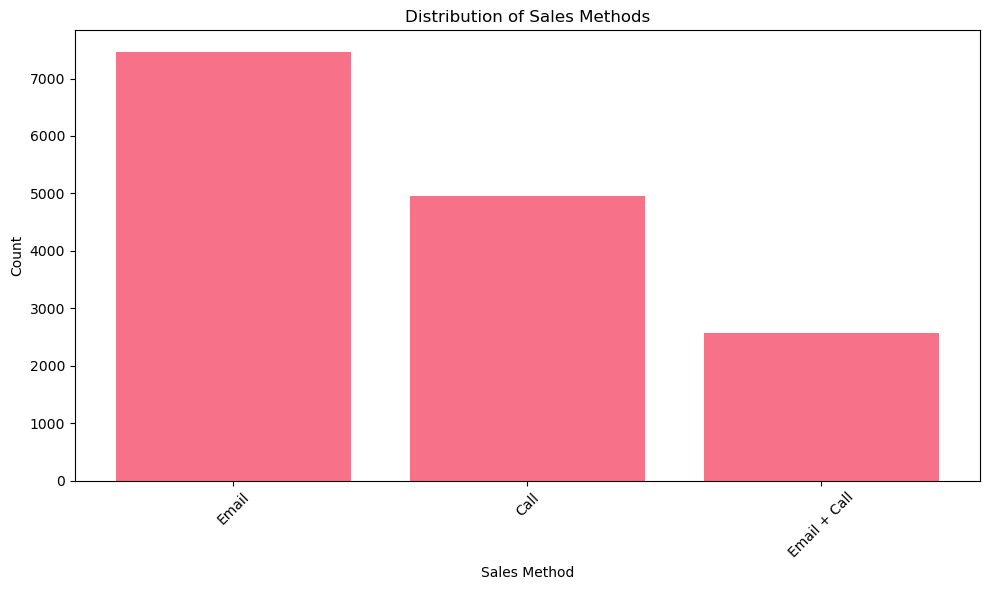

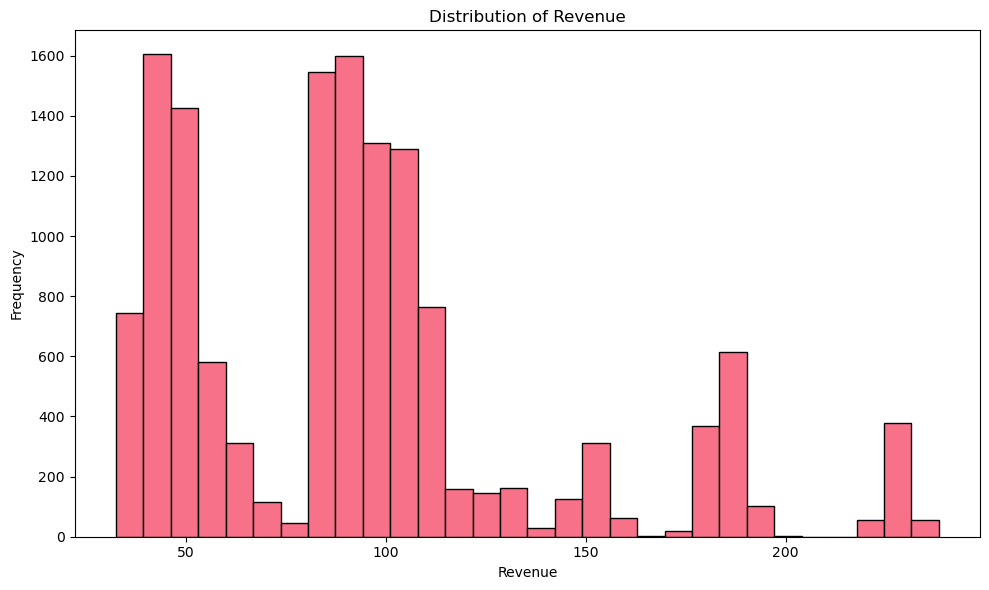

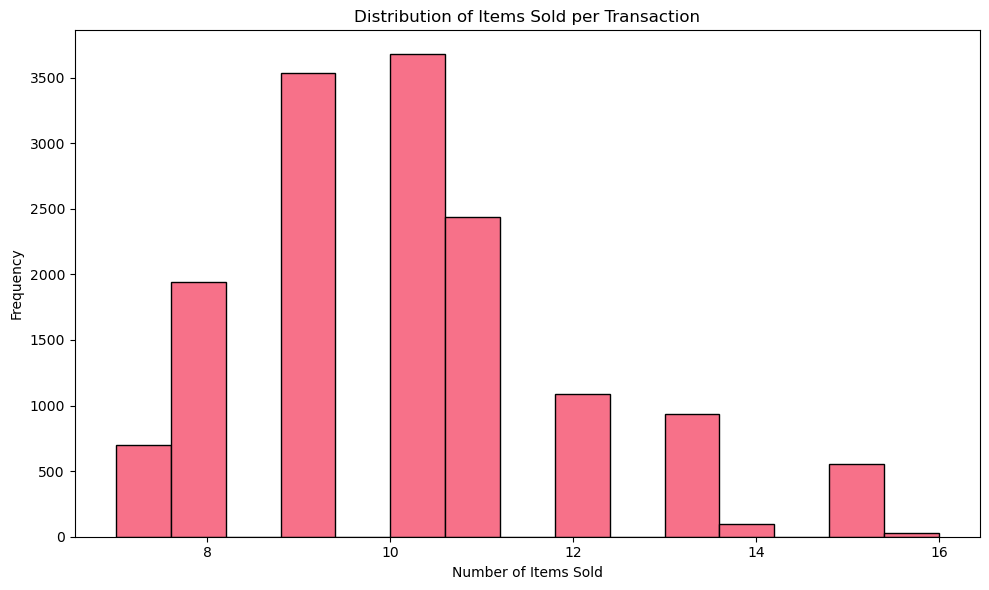

In [5]:
# Plot 1: Distribution of Sales Methods
plt.figure(figsize=(10, 6))
sales_method_counts = cleaned_df['sales_method'].value_counts()
plt.bar(sales_method_counts.index, sales_method_counts.values)
plt.title('Distribution of Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Revenue
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['revenue'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 3: Distribution of Items Sold
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['nb_sold'], bins=15, edgecolor='black')
plt.title('Distribution of Items Sold per Transaction')
plt.xlabel('Number of Items Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

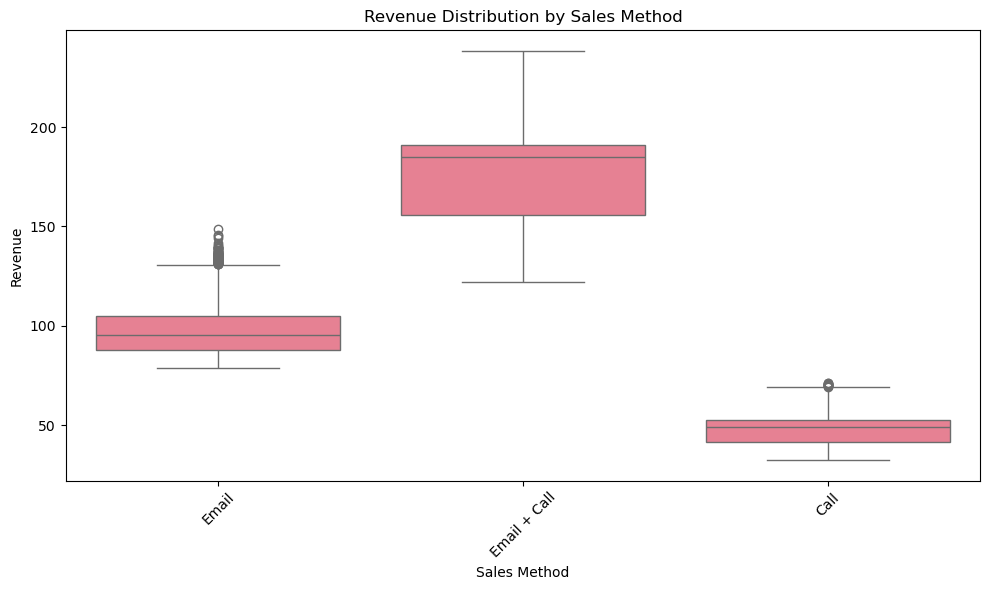

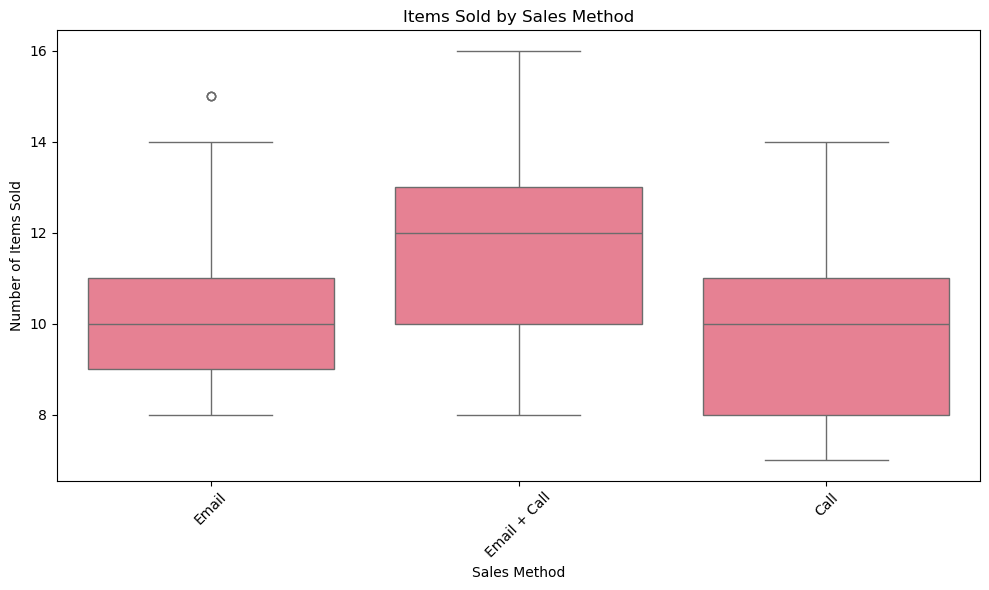

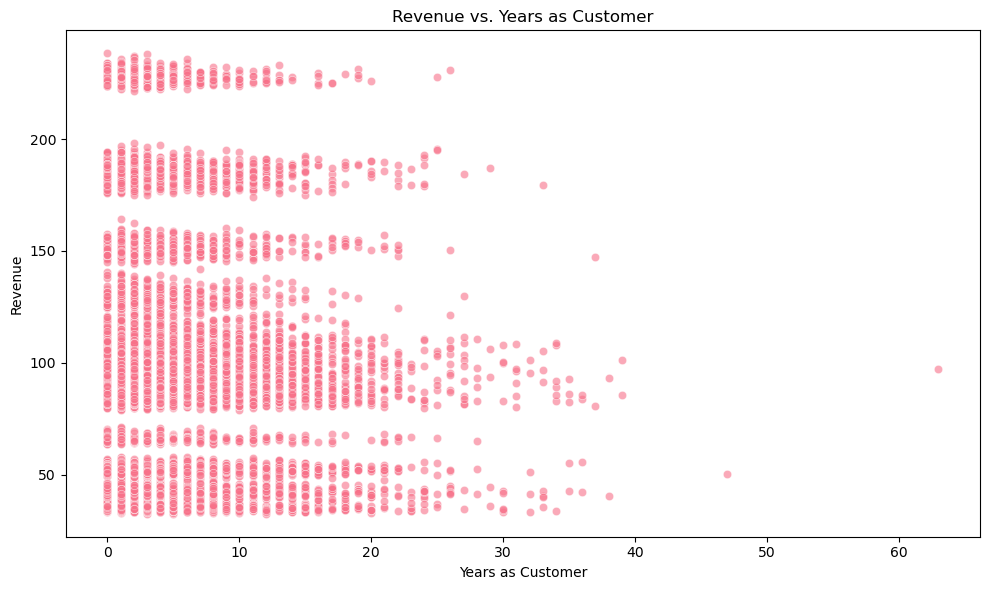

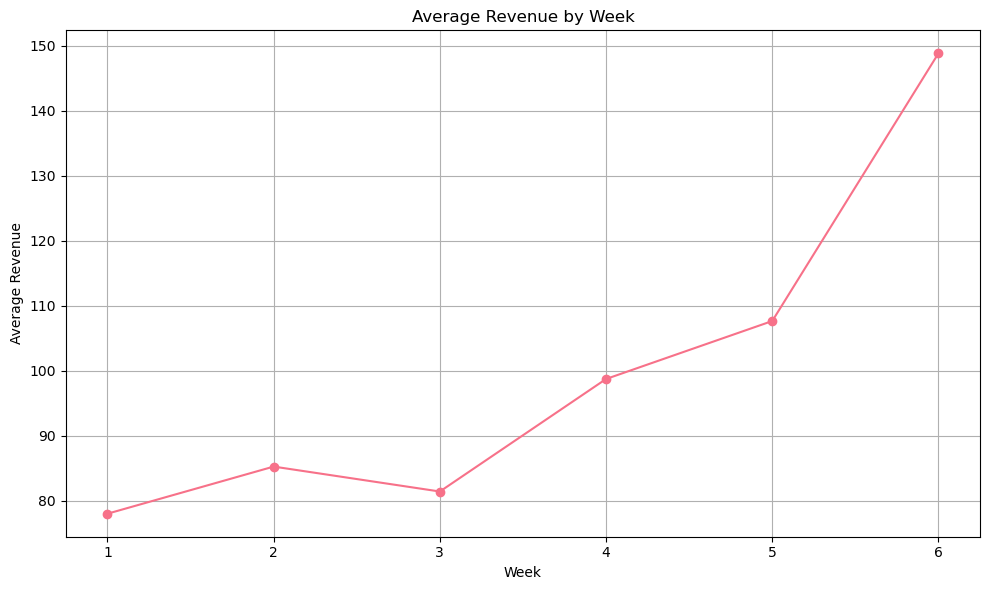

In [6]:
# Plot 4: Revenue by Sales Method
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='sales_method', y='revenue')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 5: Items Sold by Sales Method
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='sales_method', y='nb_sold')
plt.title('Items Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 6: Revenue vs. Years as Customer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='years_as_customer', y='revenue', alpha=0.6)
plt.title('Revenue vs. Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Plot 7: Average Revenue by Week
plt.figure(figsize=(10, 6))
weekly_revenue = cleaned_df.groupby('week')['revenue'].mean()
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o')
plt.title('Average Revenue by Week')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Calculate average revenue per sale method
avg_revenue_by_method = cleaned_df.groupby('sales_method')['revenue'].mean()
print("Average Revenue by Sales Method:")
print(avg_revenue_by_method)

# Calculate conversion rate (items sold per contact)
conversion_by_method = cleaned_df.groupby('sales_method')['nb_sold'].mean()
print("\nAverage Items Sold by Sales Method:")
print(conversion_by_method)

# Calculate revenue per customer
revenue_per_customer = cleaned_df.groupby('customer_id')['revenue'].sum().mean()
print(f"\nAverage Revenue per Customer: ${revenue_per_customer:.2f}")

# Calculate customer lifetime value proxy
clv_proxy = cleaned_df.groupby('customer_id').agg({
    'revenue': 'sum',
    'years_as_customer': 'max'
})
print(f"\nAverage CLV Proxy: ${clv_proxy['revenue'].mean():.2f}")

Average Revenue by Sales Method:
sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64

Average Items Sold by Sales Method:
sales_method
Call             9.509674
Email            9.729306
Email + Call    12.225505
Name: nb_sold, dtype: float64

Average Revenue per Customer: $87.21

Average CLV Proxy: $87.21


In [8]:
# Define a key metric: Average Revenue per Sales Method Contact
print("KEY METRIC: Average Revenue per Sales Method Contact")
print("=" * 50)
for method in avg_revenue_by_method.index:
    print(f"{method}: ${avg_revenue_by_method[method]:.2f}")

# Calculate efficiency ratio (revenue per unit of effort)
# Assuming Email = 1 unit, Call = 2 units, Email+Call = 3 units
effort_units = {
    'Email': 1,
    'Call': 2,
    'Email + Call': 3
}

efficiency_ratio = {}
for method in avg_revenue_by_method.index:
    efficiency_ratio[method] = avg_revenue_by_method[method] / effort_units[method]

print("\nEfficiency Ratio (Revenue per Effort Unit):")
for method, ratio in efficiency_ratio.items():
    print(f"{method}: {ratio:.2f}")

KEY METRIC: Average Revenue per Sales Method Contact
Call: $47.60
Email: $97.13
Email + Call: $183.65

Efficiency Ratio (Revenue per Effort Unit):
Call: 23.80
Email: 97.13
Email + Call: 61.22


In [9]:
# Save the cleaned dataset for future use
cleaned_df.to_csv('cleaned_product_sales.csv', index=False)
print("\nAnalysis complete. Cleaned data saved to 'cleaned_product_sales.csv'")


Analysis complete. Cleaned data saved to 'cleaned_product_sales.csv'
